In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
scales, acc_analog_qtest, acc_analog = np.loadtxt('res_both_qtrain_False.txt').T
scales2, acc_qtrain_qtest, acc_qtrain = np.loadtxt('res_both_qtrain_True.txt').T
# idx = np.argsort(scales)
# assert np.allclose(scales, scales2)
# acc_analog = acc_analog[idx]
# scales = scales[idx]
# acc_qtrain = acc_qtrain[idx]

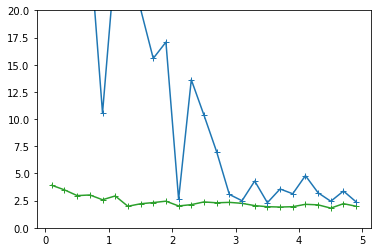

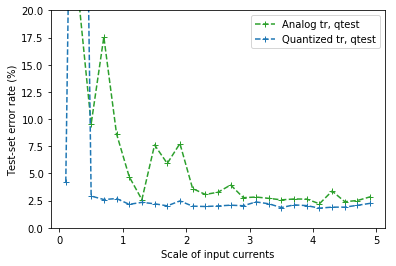

In [35]:
analog_err = 100*(1-acc_analog)
qtrain_err = 100*(1-acc_qtrain)
analog_err_q = 100*(1-acc_analog_qtest)
qtrain_err_q = 100*(1-acc_qtrain_qtest)

plt.plot(scales, analog_err , '+-', c='C2', label='Analog tr')
plt.plot(scales, qtrain_err, '+-', c='C0', label='Quantized tr')
plt.ylim([0., 20])

plt.figure()
plt.plot(scales, analog_err_q , '+--', c='C2', label='Analog tr, qtest')
plt.plot(scales, qtrain_err_q, '+--', c='C0', label='Quantized tr, qtest')
plt.legend()
plt.title('')
plt.ylim([0., 20])
plt.xlabel('Scale of input currents')
plt.ylabel('Test-set error rate (%)');

(0, 10)

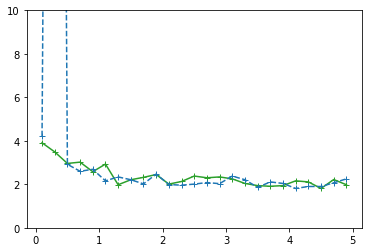

In [36]:
plt.plot(scales, analog_err , '+-', c='C2', label='Analog tr')
plt.plot(scales, qtrain_err_q, '+--', c='C0', label='Quantized tr, qtest')
plt.ylim([0, 10])